In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gauss_func(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma)**2) 

In [4]:
def integral(func, mu, sigma, start_point, end_point, n_samples):
    step = (end_point - start_point) / n_samples
    result = [0]
    for i in range(1, n_samples):
        result.append(result[i - 1] + func(start_point + step / 2, mu, sigma) * step)
        start_point += step
    return result 

## Let's try to get high accuracy

In [5]:
START_POINT = -2**10
END_POINT = 2**10
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

In [6]:
mu_sig = [[0,1], [0, 5], [5, 2]]
COLORS = ['red', 'blue', 'green']

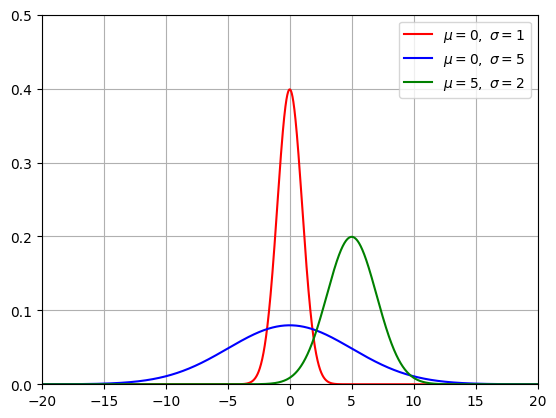

In [7]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

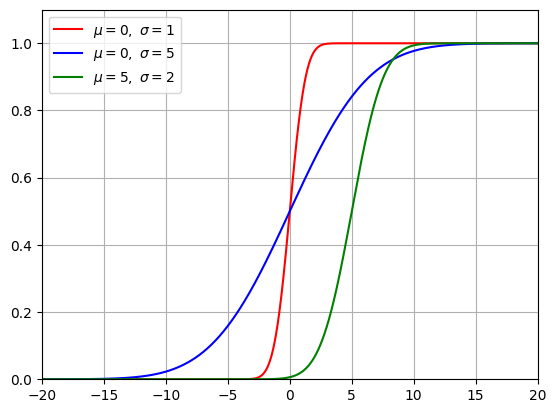

In [8]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [9]:
last_points

[1.0, 1.0000000000000109, 1.0000000000000184]

### Results
So as we know function probability must be equal to 1 in +infinity and we got really close results.


## Let's take lower bounds

In [10]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 0.01)

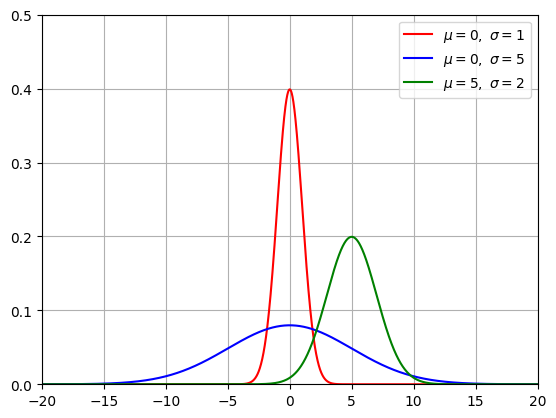

In [11]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

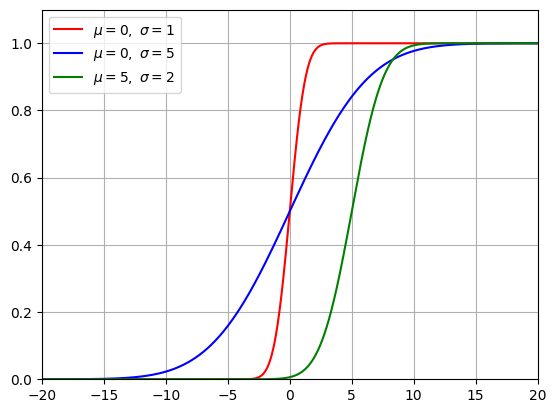

In [12]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [13]:
last_points

[1.0, 1.0000000000000107, 1.000000000000021]

### Results
So as we can see according exactly to gaussian it doesn't demand huge bounds to get high accuracy in integral, due to exponential growth. 

## Let's take lower number of samples

In [14]:
START_POINT = -100
END_POINT = 100
SAMPLES_NUMBER = int((END_POINT - START_POINT) / 1)

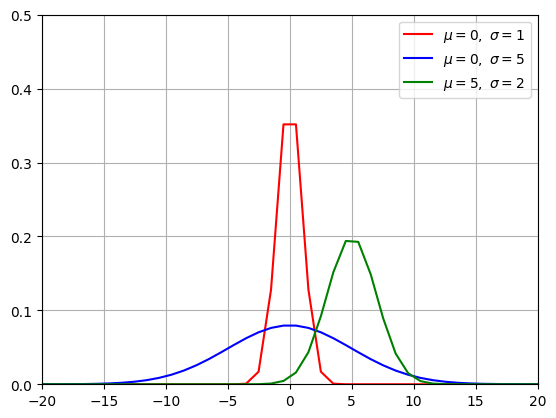

In [15]:
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = gauss_func(X, mu_sig[i][0], mu_sig[i][1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 0.5])
plt.grid()
plt.legend()
plt.show()

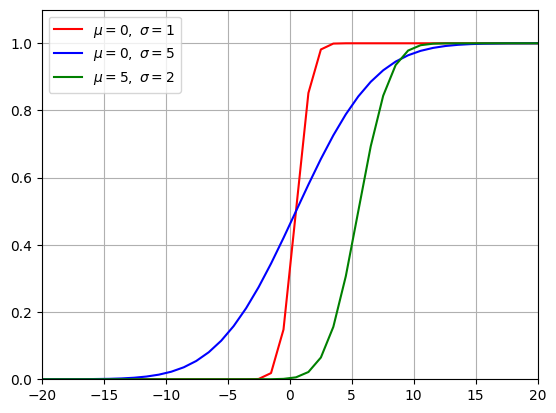

In [16]:
last_points = []
for i in range(len(mu_sig)):
    X = np.linspace(START_POINT, END_POINT, SAMPLES_NUMBER)
    Y = integral(gauss_func, mu_sig[i][0], mu_sig[i][1], START_POINT, END_POINT, SAMPLES_NUMBER)
    last_points.append(Y[-1])
    plt.plot(X, Y, color=COLORS[i], label=rf'$\mu = {mu_sig[i][0]}, \ \sigma = {mu_sig[i][1]} $')
plt.axis([-20, 20, 0, 1.1])
plt.grid()
plt.legend()
plt.show()

In [17]:
last_points

[0.9999999946494242, 1.0, 1.0]

### Results
Even with step=1 we get pretty high accuracy, again due to exponential growth of gaussian.

## Dependency between the accuracy and the step

We will take the integral from -1 to 1, for example, and get the difference between the result with the low step (=0,01) and the current step

In [46]:
def integral(func, mu, sigma, start_point, end_point, step):
    n_samples = int((end_point - start_point) / step)
    result = 0
    for i in range(1, n_samples):
        #print(result)
        result+= func(start_point + step / 2, mu, sigma) * step
        start_point += step
    return result 

In [70]:
STEPS = np.linspace(0.01, 2, 1000)
START_POINT = -2
END_POINT = 2
INFINITY = - 2**10
# RIGHT_ANS = integral(gauss_func, 0, 1, INFINITY, END_POINT, 0.01) \
#              - integral(gauss_func, 0, 1, INFINITY, START_POINT,  0.01)
RIGHT_ANS = integral(gauss_func, 0, 1, START_POINT, END_POINT, 0.01)
RIGHT_ANS


0.953955306919637

[0.0, 0.000480630177218333, 0.00025168327917513, 0.0006664410695983447, 0.001068930662037948, 0.0010047530063059806, 0.000931523482975094, 0.0008515839639409162, 0.0012218588344100612, 0.0013610752792704295, 0.0023191545749180476, 0.0018651797784444701, 0.003321727410499631, 0.0023680706622337677, 0.002861104153847549, 0.002391576482964397, 0.0031254376658740313, 0.002410013436988545, 0.0026573391019596437, 0.0038907966625131296, 0.0030334660502380206, 0.0029174678045694735, 0.0035347516904717935, 0.004928758154044588, 0.0034195767167646274, 0.006251481330342257, 0.005854957662194349, 0.005990538857551075, 0.006664460812761064, 0.003432486669378232, 0.004948163275287576, 0.007078857932029448, 0.004821634332810354, 0.00791303377092445, 0.006267744795917629, 0.004951959512915272, 0.009488919061277579, 0.00876511764137089, 0.008336905820981122, 0.00819477799975088, 0.008335614854960705, 0.008762601995902952, 0.009485314250238464, 0.010519966368234046, 0.011889832187313987, 0.0062593403018

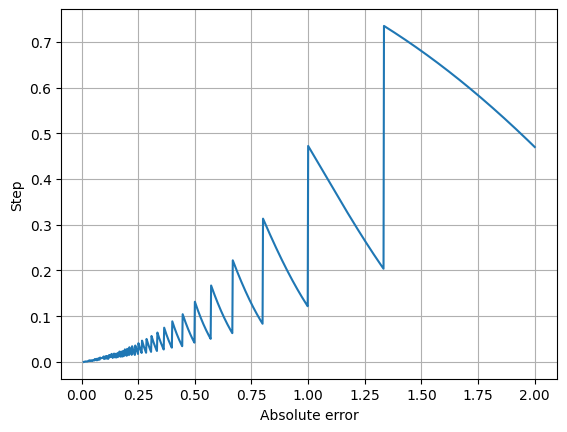

In [72]:
Y = []
for step in STEPS:
    current = integral(gauss_func, 0, 1, START_POINT, END_POINT, step)
    Y.append(abs(current - RIGHT_ANS))
print(Y)
plt.plot(STEPS, Y)
#plt.axis([-20, 20, 0, 1.1])
plt.xlabel('Absolute error')
plt.ylabel('Step')
plt.grid()
plt.show()

## N-dimensional Gaussian distribution

In [ ]:
def func(x):
    